In [7]:
import imageio.v2 as imageio
import numpy
import gari
target_im = imageio.imread('fruit.jpg')
target_im = numpy.asarray(target_im/255, dtype=numpy.float)

In [8]:
import numpy

target_chromosome = gari.img2chromosome(target_im)

def fitness_fun(ga_instance, solution, solution_idx):
    fitness = numpy.sum(numpy.abs(target_chromosome - solution))
    fitness = numpy.sum(target_chromosome) - fitness
    return fitness


In [12]:
pip install pygad


Note: you may need to restart the kernel to use updated packages.


In [27]:
import pygad

ga_instance = pygad.GA(
    num_generations=2,
    num_parents_mating=10,
    fitness_func=fitness_fun,
    sol_per_pop=20,
    num_genes=target_im.size,
    init_range_low=0.0,
    init_range_high=1.0,
    mutation_percent_genes=0.01,
    mutation_type="random",
    mutation_by_replacement=True,
    random_mutation_min_val=0.0,
    random_mutation_max_val=1.0
 
)


In [28]:
ga_instance.run() 

In [29]:
import matplotlib.pyplot
ga_instance.plot_result()

AttributeError: 'GA' object has no attribute 'plot_result'

Fitness value of the best solution = 30037.878966049502
Index of the best solution : 11
Best fitness value reached after 2 generations.


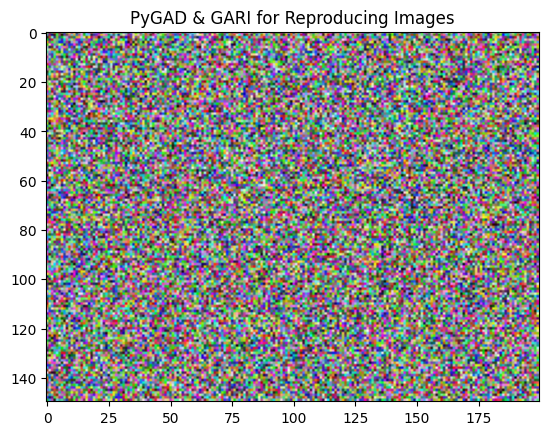

In [30]:
# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

result = gari.chromosome2img(solution, target_im.shape)
matplotlib.pyplot.imshow(result)
matplotlib.pyplot.title("PyGAD & GARI for Reproducing Images")
matplotlib.pyplot.show()